In [0]:
!pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from matplotlib import pyplot as plt
import pandas as pd
from copy import deepcopy
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def GoogleDriveAuth(ID):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    file = drive.CreateFile({'id': ID})
    return file

File_ID = '1rPCy0EmMV5LlE1zlsGyJ9mK8b8Tdifl1'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('checkerboard4.jpg')

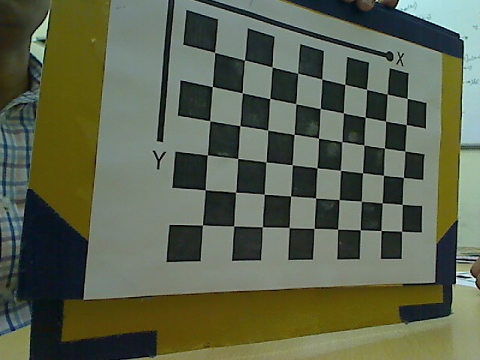

In [0]:
img=cv2.imread('checkerboard4.jpg')
img=cv2.resize(img,None,fx=0.75,fy=0.75,interpolation=cv2.INTER_CUBIC)
cv2_imshow(img)

In [0]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Find the chess board corners
ret, corners = cv2.findChessboardCorners(gray, (9,6),None) #image,pattern size

In [0]:
corners.shape

(54, 1, 2)

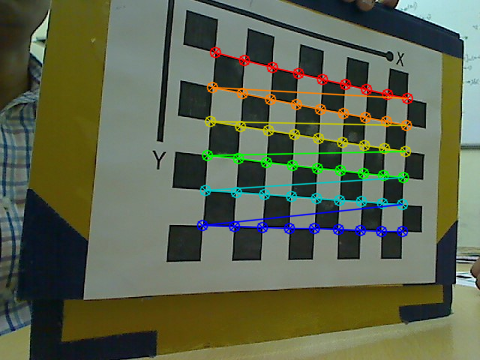

In [0]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)   #stop when accuracy and iteration is achieved, iteration,epsilon
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
objpoints = [] # 3d point in real world space when taken from different orientation
imgpoints = [] # 2d points in image plane
if ret == True:
  objpoints.append(objp)
  corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria) #img, corners, 11*2+1=(22,22) search window
  imgpoints.append(corners2)
  # Draw and display the corners
  img = cv2.drawChessboardCorners(img, (9,6), corners2,ret)  #img, pattern size, corners, bool if pattern found
  cv2_imshow(img)
  cv2.waitKey(500)



In [0]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

In [0]:
ret

0.23472948082181114

In [0]:
mtx            #camera matrix     fx 0  Cx
                               #  0  fy Cy
                               #  0  0  1

array([[164.05578442,   0.        , 274.98838445],
       [  0.        , 189.68174419, 188.99648424],
       [  0.        ,   0.        ,   1.        ]])

In [0]:
dist           #distortion coefficient

array([[0.00804147, 0.00543668, 0.00183777, 0.0151063 , 0.01310897]])

In [0]:
rvecs          #rotational vector

[array([[-0.02490401],
        [-0.24313624],
        [ 0.06569005]])]

In [0]:
tvecs  #translation vector

[array([[-2.08048305],
        [-3.97069733],
        [ 5.48926429]])]

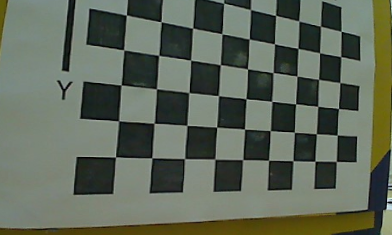

In [0]:
img=cv2.imread('checkerboard4.jpg')
img=cv2.resize(img,None,fx=0.75,fy=0.75,interpolation=cv2.INTER_CUBIC)
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

# undistort
#dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2_imshow(dst)

In [0]:
roi   #x,y,w,h

(70, 69, 392, 235)

In [0]:
newcameramtx

array([[185.58227539,   0.        , 269.11182969],
       [  0.        , 192.66941833, 189.11535242],
       [  0.        ,   0.        ,   1.        ]])

In [0]:
mtx

array([[164.05578442,   0.        , 274.98838445],
       [  0.        , 189.68174419, 188.99648424],
       [  0.        ,   0.        ,   1.        ]])

In [0]:
from past.builtins import xrange
tot_error=0
for i in xrange(len(objpoints)):
  
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error

print ("Reprojection error: ", tot_error/len(objpoints))

Reprojection error:  0.03194256236960859


# Image-2

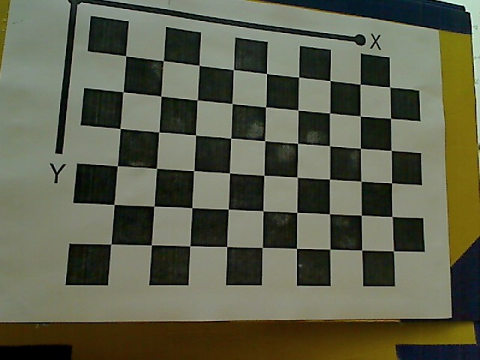

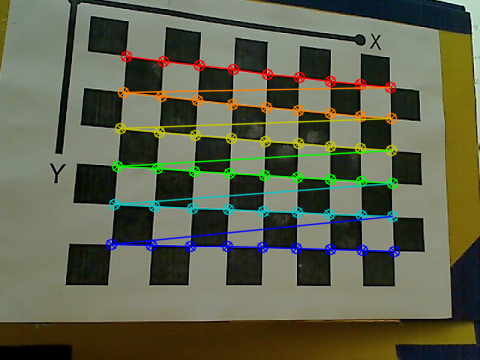

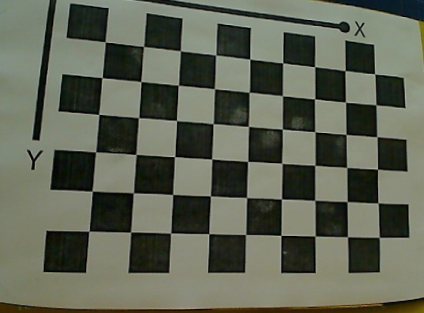

total error:  0.025372763176025923


In [0]:
File_ID = '1iDixcy19-BBXS-flHNWJC0zgSgowNxcP'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('checkerboard2.jpg')

img=cv2.imread('checkerboard2.jpg')
img=cv2.resize(img,None,fx=0.75,fy=0.75,interpolation=cv2.INTER_CUBIC)
cv2_imshow(img)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Find the chess board corners
ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane
if ret == True:
  objpoints.append(objp)
  corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
  imgpoints.append(corners2)
  # Draw and display the corners
  img = cv2.drawChessboardCorners(img, (9,6), corners2,ret)
  cv2_imshow(img)
  cv2.waitKey(500)
  
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

img=cv2.imread('checkerboard2.jpg')
img=cv2.resize(img,None,fx=0.75,fy=0.75,interpolation=cv2.INTER_CUBIC)
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

# undistort
#dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2_imshow(dst)

from past.builtins import xrange
mean_error = 0
tot_error=0
for i in xrange(len(objpoints)):
  
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error

print ("total error: ", tot_error/len(objpoints))



# Image-3

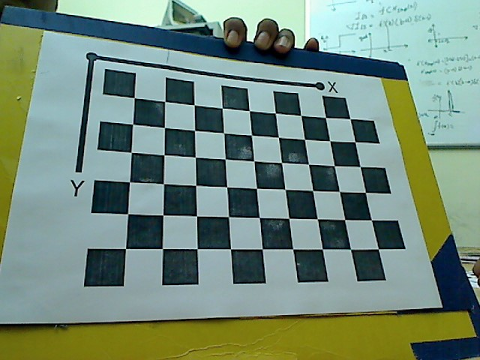

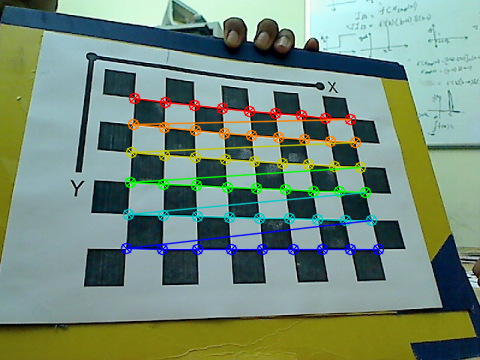

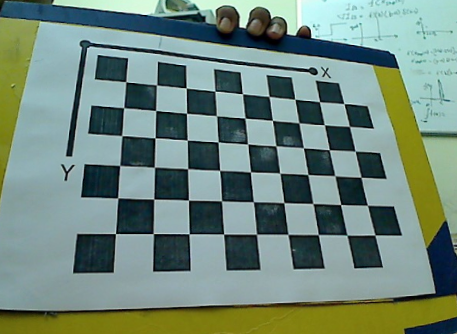

total error:  0.031333677180939


In [0]:
File_ID = '1CGw72IkEcKrNkNYh1uMhmi611GMzCt6L'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('checkerboard6.jpg')

img=cv2.imread('checkerboard6.jpg')
img=cv2.resize(img,None,fx=0.75,fy=0.75,interpolation=cv2.INTER_CUBIC)
cv2_imshow(img)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Find the chess board corners
ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane
if ret == True:
  objpoints.append(objp)
  corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
  imgpoints.append(corners2)
  # Draw and display the corners
  img = cv2.drawChessboardCorners(img, (9,6), corners2,ret)
  cv2_imshow(img)
  cv2.waitKey(500)
  
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

img=cv2.imread('checkerboard6.jpg')
img=cv2.resize(img,None,fx=0.75,fy=0.75,interpolation=cv2.INTER_CUBIC)
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

# undistort
#dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2_imshow(dst)

from past.builtins import xrange
mean_error = 0
tot_error=0
for i in xrange(len(objpoints)):
  
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error

print ("total error: ", tot_error/len(objpoints))



# Image-4

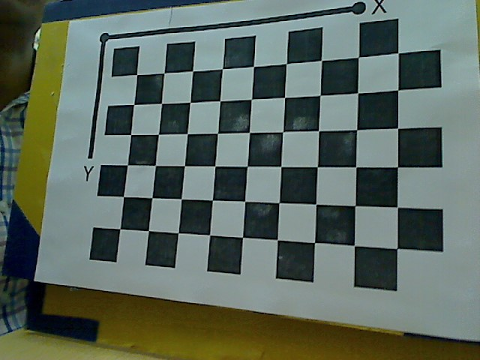

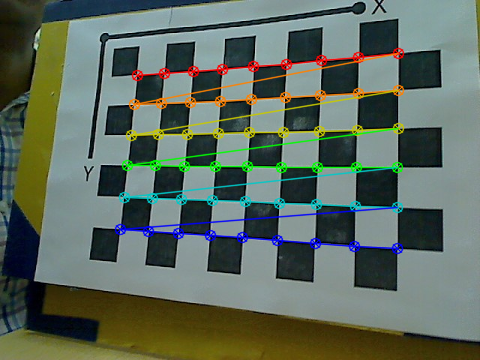

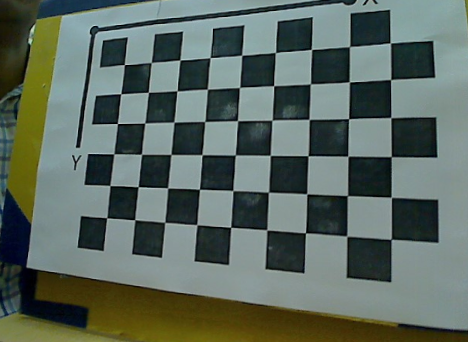

total error:  0.027252531149920795


In [0]:
File_ID = '1p1VuUXqQtNGGN-oU58uFBy8Q0jJS2e6e'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('checkerboard5.jpg')

img=cv2.imread('checkerboard5.jpg')
img=cv2.resize(img,None,fx=0.75,fy=0.75,interpolation=cv2.INTER_CUBIC)
cv2_imshow(img)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Find the chess board corners
ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane
if ret == True:
  objpoints.append(objp)
  corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
  imgpoints.append(corners2)
  # Draw and display the corners
  img = cv2.drawChessboardCorners(img, (9,6), corners2,ret)
  cv2_imshow(img)
  cv2.waitKey(500)
  
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

img=cv2.imread('checkerboard5.jpg')
img=cv2.resize(img,None,fx=0.75,fy=0.75,interpolation=cv2.INTER_CUBIC)
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

# undistort
#dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2_imshow(dst)

from past.builtins import xrange
mean_error = 0
tot_error=0
for i in xrange(len(objpoints)):
  
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error

print ("total error: ", tot_error/len(objpoints))

